# Explatory Data Analysis: Undrstanding the factors behind Loan default and prediction of loan_status
<br>
Submitted by- Vinay Kumar Dahiya

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [10]:
df=pd.read_excel('loan.xlsx',skip_row=1)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Let's have a detailed view of the dataset and it's features
<br>

In [18]:
profile=pandas_profiling.ProfileReport(df)
profile.to_file(outputfile='report.html')

In [20]:
#Also available in attached HTML file 'report.html'
profile

Number of variables,111
Number of observations,39717
Total Missing (%),51.3%
Total size in memory,33.6 MiB
Average record size in memory,888.0 B
Numeric,21
Categorical,13
Boolean,3
Date,5
Text (Unique),1
Rejected,68


<br>

### Outcome of the overview report:

1. Drop all the features with all the missing values.
2. Drop all the highly correlated features
3. Features 'desc', 'title' can be dropped. A similar and better feature serving the same use 'purpose' is available.
4. Drop  the feature 'url'. It is a string type variable having unique values for each row, so it can't be useful towards the      model. Also 'emp_title' can be dropped as it has extremely high cardinality
5. The feature, 'zip_code has high cardinality. 'addr_state' provides a similar however a shallower insight into the region the    applicant belongs to.
6. 'id' can be used as the index or be dropped.
7. Constant columns can be dropped


#### Dropping the above mentioned columns

In [11]:
#highly correlated values
high_corr=['funded_amnt','funded_amnt_inv', 'installment', 'member_id', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp']
# with all missing values
high_missing=[col for col in df.select_dtypes(include=np.number).columns if((np.isnan(df[col]).sum())+len(df[df[col]==0])==len(df))]
# others to be dropped
misc=['desc','title','url','id','emp_title']

In [12]:
#All the columns to be dropped
drop_col=high_corr+high_missing+misc
len(drop_col)

72

In [13]:
df.drop(drop_col,axis=1,inplace=True)

<br>

In [14]:
unique_val=[col for col in df.columns if((df[col].nunique()==len(df)) | (df[col].nunique()==1 ))]
unique_val

['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type']

In [15]:
df.drop(unique_val,axis=1,inplace=True)

<br>

In [8]:
#Now, the rows for which loan_status is Current, can't be used in training the model, so,we can just drop them


df=df.drop(df[df['loan_status']=='Current'].index,axis=0)


<br>

### Viewing the datatypes

In [10]:
df.dtypes

loan_amnt                           int64
term                               object
int_rate                          float64
grade                              object
sub_grade                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetime64[ns]
inq_last_6mths                      int64
mths_since_last_delinq            float64
mths_since_last_record            float64
open_acc                            int64
pub_rec                             int64
revol_bal                           int64
revol_util                        

## Let's see the percentage of missing and constant values in the dataset

In [11]:
(df.isna()|(df.nunique()==1)).sum()/len(df)*100

loan_amnt                    0.000000
term                         0.000000
int_rate                     0.000000
grade                        0.000000
sub_grade                    0.000000
emp_length                   2.677761
home_ownership               0.000000
annual_inc                   0.000000
verification_status          0.000000
issue_d                      0.000000
loan_status                  0.000000
purpose                      0.000000
zip_code                     0.000000
addr_state                   0.000000
dti                          0.000000
delinq_2yrs                  0.000000
earliest_cr_line             0.000000
inq_last_6mths               0.000000
mths_since_last_delinq      64.559193
mths_since_last_record      92.897322
open_acc                     0.000000
pub_rec                      0.000000
revol_bal                    0.000000
revol_util                   0.129611
total_acc                    0.000000
out_prncp                  100.000000
total_rec_in

As can be seen, the features, out_prncp and next_pymnt_d are either null or constant for the entire training dataset, which makes sense too. So we need to drop them, and since the model will be trained without these features, they should be dropped from the the test set(temp df) as well.

In [12]:
df.drop(['out_prncp','next_pymnt_d'],axis=1,inplace=True)
temp.drop(['out_prncp','next_pymnt_d'],axis=1,inplace=True)

NameError: name 'temp' is not defined

In [ ]:
#final shape of dataset
print(df.shape)
df.dtypes

*The final profile reports in present in report3.html*

<br>

<br>

## Now we'll try and train a classifier models
Making use of RandomForest for classification along with pipelines and cross_validation for scores
<br>

In [86]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,log_loss



req_col=df.columns
req_col=list(set(req_col)-set(df.select_dtypes(include='datetime').columns))

req_col.remove('mths_since_last_delinq')
req_col.remove('mths_since_last_record')
req_col.remove('pub_rec_bankruptcies')
req_col.remove('addr_state')
req_col.remove('sub_grade')
#Dropping the addr_state and sub_grade for having high cardinality

X=df[req_col].copy()
#df_exp.loc[:,'addr_state']=LabelEncoder().fit(df_exp.loc[:,'addr_state'])
#df_exp.loc[:,'sub_grade']=LabelEncoder().fit(df_exp.loc[:,'sub_grade'])

X['loan_status'].replace(to_replace=['Fully Paid', 'Charged Off'],value=[1,0],inplace=True)

X['dti'].replace(to_replace=[0],value=X['dti'].mean(),inplace=True)

#df_exp['revol_util'].replace(to_replace=[np.nan],value=df_exp['revol_util'].mean(),inplace=True)

y=X['loan_status'].copy()
X.drop('loan_status',axis=1,inplace=True)






Making the final Pipeline and fitting the model to obtain the accuracy scores

In [98]:
numerical_transformer=SimpleImputer()
num_col=list(set(X.select_dtypes(include=np.number).columns).intersection(set(req_col)))


categorical_transformer=make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown='ignore'))
cat_col=list(set(X.select_dtypes(exclude=np.number).columns).intersection(set(req_col)))


preprocess=ColumnTransformer(transformers=[('num',numerical_transformer,num_col),('cat',categorical_transformer,cat_col)])
my_model=RandomForestClassifier(n_estimators=100,random_state=0)
my_pipeline=make_pipeline(preprocess,my_model)

scores=cross_val_score(my_pipeline,X,y,cv=5,scoring='accuracy',error_score='raise')

In [99]:
scores.mean()

0.9638900541484527

Using log_loss for metric

In [100]:
scores=-1*cross_val_score(my_pipeline,X,y,cv=5,scoring='neg_log_loss',error_score='raise')


In [101]:
scores.mean()

0.13345180631713874

## The above model can predict the status of loan for a borrower, and hence can be used to identify a potential defaulter  

In [55]:
from datetime import datetime, timedelta
X=df.copy()
y=X['loan_status'].copy()

X.isna().sum()
temp=X.select_dtypes(include='datetime').copy()
temp['period']=(X['issue_d']-X['earliest_cr_line'])/timedelta(days=30)
temp['loan_status']=X['loan_status']
plt.scatter(x=)

dtype('float64')

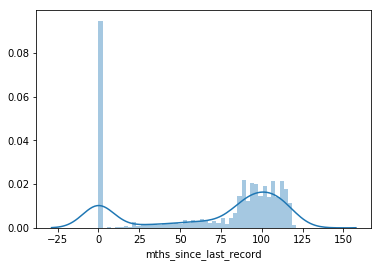

In [28]:
sns.distplot(X.mths_since_last_record, bins =50)